In [1276]:
# Importing the libraries
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np

In [1277]:
# Importing the dataset
dataset = pd.read_csv('spambase.csv')
dataset.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [1278]:
dataset.head(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [1279]:
dataset.duplicated()
print(dataset)

         0  0.64  0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6  ...   0.40  \
0     0.21  0.28    0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
1     0.06  0.00    0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
2     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
3     0.00  0.00    0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00    0.00  0.0  1.85  0.00  0.00  1.85  0.00  0.00  ...  0.000   
...    ...   ...     ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4595  0.31  0.00    0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4596  0.00  0.00    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.30  0.00    0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4598  0.96  0.00    0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4599  0.00  0.00    0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

       0.41  0.42  0.778   

## Identifying and Cleaning Duplicated Data

In [1280]:
print(dataset.isnull().sum(),"\n")
data = dataset.dropna()

print(data.duplicated().sum())

data = data.drop_duplicates()
print()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64 

391



In [1281]:
# separating the independent variables (features) and dependent variable (target) from a dataset
X = dataset.iloc[:, :-1]# select all rows and all columns except the last one
y = dataset.iloc[:, -1] # select all rows and the last column

In [1282]:
X

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [1283]:
 # imports the  train_test_split function from scikit-learn
# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1284]:
from sklearn.tree import DecisionTreeClassifier
#generating the  predicted labels for each example in the test set based on the decision tree that fitted to the training data
tree_map = DecisionTreeClassifier()
tree_map.fit(X_train,y_train)

DecisionTreeClassifier()

## Feature Scaling

In [1285]:
#scaling the dataset to a array
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train,X_test)

[[-0.33869288 -0.16862667  1.30208688 ... -0.11782694 -0.33683972
  -0.30431329]
 [-0.33869288 -0.16862667 -0.56108137 ... -0.12822811 -0.38367339
  -0.447789  ]
 [-0.33869288 -0.16862667 -0.56108137 ... -0.08490071 -0.29000605
  -0.44111571]
 ...
 [-0.33869288 -0.16862667 -0.56108137 ... -0.04550625 -0.22756115
  -0.34602135]
 [-0.14140126 -0.16862667 -0.19254259 ... -0.09370921 -0.22756115
   1.28559771]
 [-0.33869288 -0.16862667 -0.56108137 ... -0.12488023 -0.36806216
  -0.42276417]] [[-0.33869288 -0.16862667  0.52406058 ...  0.00302175  0.0768577
  -0.25760027]
 [-0.33869288 -0.03363077  0.19647056 ... -0.0998199  -0.29000605
  -0.05406497]
 [-0.33869288  1.59381981 -0.56108137 ...  0.00991253 -0.23536677
  -0.40608094]
 ...
 [-0.33869288 -0.16862667 -0.56108137 ... -0.12822811 -0.38367339
  -0.47114551]
 [-0.33869288 -0.16862667 -0.56108137 ... -0.08964625 -0.35245094
  -0.4177592 ]
 [-0.33869288 -0.16862667 -0.56108137 ... -0.00341398 -0.23536677
   0.48480308]]


## KNeighboursClassifier

In [1310]:
# Fitting classifier to the Training set
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [1311]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 

## DecisionTree Classifier

In [1312]:
#Create a DecisionTreeClassifier object with 3 neighbors
# Fit the model to the training data  Make predictions on the test data
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## KNN model Metrics

In [1313]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.9097826086956522


In [1314]:
#make predictions on dataset using Kneighbors classifier
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_y_pred = KNN_model.predict(X_test)

KNN_precision = precision_score(y_test,KNN_y_pred)
KNN_f1 = f1_score(y_test, KNN_y_pred)

In [1315]:
print("KNN Model Metrics:")
print("Precision:", KNN_precision)
print("F1 Score:", KNN_f1)

KNN Model Metrics:
Precision: 0.8892045454545454
F1 Score: 0.8829337094499294


In [1316]:
# Make the confusion matrix KNN
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[524  39]
 [ 44 313]]


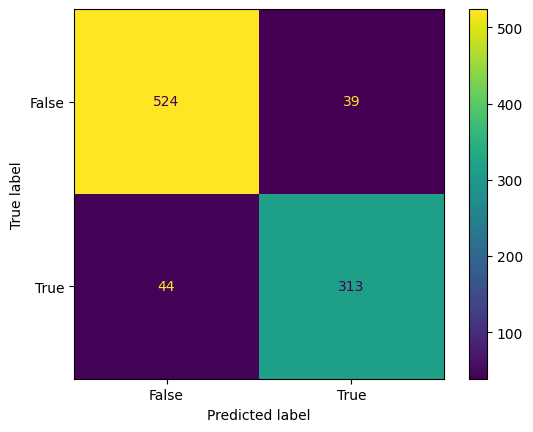

In [1317]:
from sklearn import metrics
from matplotlib import pyplot as plt

c_metrics_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])

c_metrics_display.plot()
plt.show()

<AxesSubplot:>

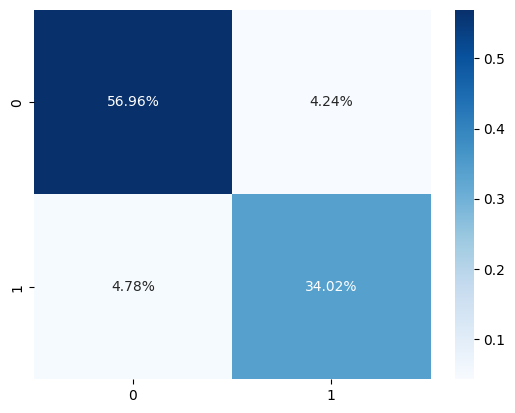

In [1318]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

## Decision Tree Model metrics

In [1327]:
# Import the necessary libraries and modules from scikit-learn
# Create an instance of the DecisionTreeClassifier class with a maximum depth of 5 and a random state of 42
decisiontree_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, min_samples_leaf=57)

# Train the decision tree model on the training data
decisiontree_model.fit(X_train, y_train)
DT_y_pred = decisiontree_model.predict(X_test)

# Calculate the accuracy of the model by comparing the predicted labels to the actual labels
DT_Accuracy = accuracy_score(y_test,DT_y_pred)
DT_precision = precision_score(y_test,DT_y_pred)
DT_f1score = f1_score(y_test,DT_y_pred)

In [1328]:
# Print out the performance metrics of the decision tree model
print("Decision Tree Model Metrics:")
print("Accuracy:",DT_Accuracy)
print("Precision:",DT_precision)
print("F1 Score:",DT_f1score)

Decision Tree Model Metrics:
Accuracy: 0.8956521739130435
Precision: 0.887240356083086
F1 Score: 0.861671469740634


In [1329]:
DT_y_pred = decisiontree_model.predict(X_test)## Predicts the class labels for the test set using the trained decision tree model and store it  in DT_y_pred
DT_y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [1330]:
#confusion matrix dt
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[524  39]
 [ 44 313]]


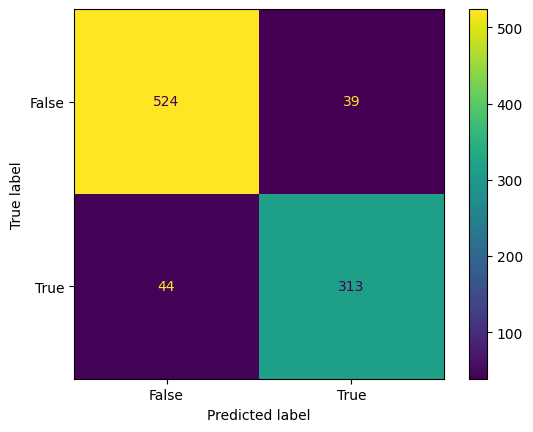

In [1331]:
from sklearn import metrics
from matplotlib import pyplot as plt
#Creates a ConfusionMatrixDisplay object and pass in the confusion matrix and the labels to display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=[False,True])

cm_display.plot()
plt.show()

<AxesSubplot:>

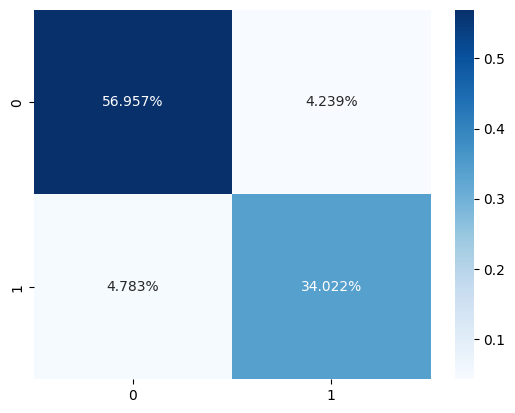

In [1332]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.3%', cmap='Blues')

## Models Evaluation

In [1333]:
print("KNN f1 score :",KNN_f1)
print("KNN accuracy: ",accuracy)
print("\n\n")
print("Decision Tree f1 score: ",DT_f1score)
print("Decision Tree accuracy score :",DT_Accuracy)

KNN f1 score : 0.8829337094499294
KNN accuracy:  0.9097826086956522



Decision Tree f1 score:  0.861671469740634
Decision Tree accuracy score : 0.8956521739130435


In [1309]:
from sklearn.metrics import classification_report

y_pred = tree_map.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.92      0.82       563
           1       0.80      0.51      0.62       357

    accuracy                           0.76       920
   macro avg       0.77      0.71      0.72       920
weighted avg       0.77      0.76      0.75       920



/Users/sunerawanni/Desktop/Machine_CW_20210206/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
